# Data Preprocessing
## Library and dataset loading


In [1]:
source("https://raw.githubusercontent.com/eogasawara/mylibrary/master/myPreprocessing.R")
loadlibrary("RColorBrewer")
loadlibrary("dplyr")
loadlibrary("gridExtra")
loadlibrary("reshape")

col.set <- brewer.pal(11, 'Spectral')
mycolors <- col.set[c(1,3,5,7,9)]

plot_size(4, 3)

Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Loading required package: scales

Warning message:
"package 'scales' was built under R version 3.6.3"
Loading required package: ggpubr

Warning message:
"package 'ggpubr' was built under R version 3.6.3"
Loading required package: reshape

Loading required package: caret

Warning message:
"package 'caret' was built under R version 3.6.3"
Loading required package: lattice

Warning message:
"package 'lattice' was built under R version 3.6.3"
Loading required package: MASS

Warning message:
"package 'MASS' was built under R version 3.6.3"
Loading required package: dplyr

Warning message:
"package 'dplyr' was built under R version 3.6.3"

Attaching package: 'dplyr'


The following object is masked from 'package:MASS':

    select


The following object is masked from 'package:reshape':

    rename


The following objects are masked from 'package:stats':

    filter, lag


The following ob

## Normalization

Normalization is a technique used to equal strength among variables. 

It is also important to apply it as an input for some machine learning methods. 

Min-Max: Adjust to 0 (minimum value) - 1 (maximum value).

Z-Score: Adjust to 0 (mean), 1 (variance).

In [2]:
myirisM <- normalize.minmax(iris)

myirisZ <- normalize.zscore(iris)

myirisZS <- normalize.zscore(iris, nmean=0.5, nsd=0.5/2.698)


grfA <- plot.density(iris %>% select(variable="Sepal.Width", value=Sepal.Width), color=mycolors[1]) 
grfB <- plot.density(myirisM$data %>% select(variable="Sepal.Width", value=Sepal.Width), color=mycolors[1]) + xlim(0,1)
grfC <- plot.density(myirisZ$data %>% select(variable="Sepal.Width", value=Sepal.Width), color=mycolors[1]) 
grfD <- plot.density(myirisZS$data %>% select(variable="Sepal.Width", value=Sepal.Width), color=mycolors[1]) + xlim(0,1)

plot_size(8, 3)
grid.arrange(grfA, grfB, grfC, grfD, ncol=4)
plot_size(4, 3)

ERROR: Error in normalize.minmax(iris): não foi possível encontrar a função "normalize.minmax"


## PCA
PCA is a technique that finds a projection that captures the largest amount of variation in data.

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
5.4,3.9,1.7,0.4


PC1,PC2,Species
2.640270,-5.204041,setosa
2.670730,-4.666910,setosa
2.454606,-4.773636,setosa
2.545517,-4.648463,setosa
2.561228,-5.258629,setosa
2.975946,-5.707321,setosa


,PC1,PC2
Sepal.Length,0.5210659,-0.37741762
Sepal.Width,-0.2693474,-0.92329566
Petal.Length,0.5804131,-0.02449161
Petal.Width,0.5648565,-0.06694199


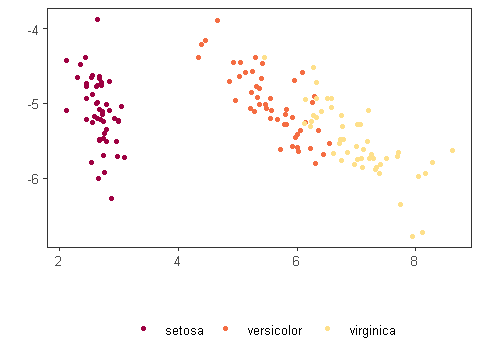

In [21]:
head(iris[,1:4])

mypca <- dt.pca(iris, "Species")
head(mypca$pca)

head(mypca$transf$pca.transf)

plot.scatter(mypca$pca %>% select(x=PC1, value=PC2, variable=Species), colors=mycolors[1:3])

## Discretization & smoothing
Discretization is the process of transferring continuous functions, models, variables, and equations into discrete counterparts. 

Smoothing is a technique that creates an approximating function that attempts to capture important patterns in the data while leaving out noise or other fine-scale structures/rapid phenomena.

An important part of the discretization/smoothing is to set up bins for proceeding the approximation.

In [22]:
bi <- smoothing.interval(iris$Sepal.Length, n=2)
bf <- smoothing.freq(iris$Sepal.Length, n=2)
bc <- smoothing.cluster(iris$Sepal.Length, n=2)

show_row(c('interval: ', sprintf("%.1f",bi$interval), 'entropy: ', sprintf("%.2f",entropy_group(bi$bins_factor, iris$Species))))
show_row(c('freq: ', sprintf("%.1f",bf$interval), 'entropy: ', sprintf("%.2f",entropy_group(bf$bins_factor, iris$Species))))
show_row(c('cluster: ', sprintf("%.1f",bc$interval), 'entropy: ', sprintf("%.2f",entropy_group(bc$bins_factor, iris$Species))))

interval:,4.3,6.1,7.9,entropy:,1.19


freq:,4.3,5.8,7.9,entropy:,1.10


cluster:,4.3,5.9,7.9,entropy:,1.10


## Optimizing the smoothing using bins based on frequencies

In [23]:
bsl <- smoothing.opt(iris$Sepal.Length, smoothing=smoothing.freq)
bsw <- smoothing.opt(iris$Sepal.Width, smoothing=smoothing.freq)
bpl <- smoothing.opt(iris$Petal.Length, smoothing=smoothing.freq)
bpw <- smoothing.opt(iris$Petal.Width, smoothing=smoothing.freq)


show_row(c('Sepal.Length: ', sprintf("%.1f",bsl$interval), 'entropy: ', sprintf("%.2f",entropy_group(bsl$bins_factor, iris$Species))))
show_row(c('Sepal.Width: ', sprintf("%.1f",bsw$interval), 'entropy: ', sprintf("%.2f",entropy_group(bsw$bins_factor, iris$Species))))
show_row(c('Petal.Length: ', sprintf("%.1f",bpl$interval), 'entropy: ', sprintf("%.2f",entropy_group(bpl$bins_factor, iris$Species))))
show_row(c('Petal.Width: ', sprintf("%.1f",bpw$interval), 'entropy: ', sprintf("%.2f",entropy_group(bpw$bins_factor, iris$Species))))

Sepal.Length:,4.3,5.0,5.4,5.8,6.3,6.7,7.9,entropy:,0.87


Sepal.Width:,2.0,2.7,2.9,3.0,3.2,3.4,4.4,entropy:,1.19


Petal.Length:,1.0,1.5,3.9,4.6,5.3,6.9,entropy:,0.39


Petal.Width:,0.1,0.2,1.2,1.5,1.9,2.5,entropy:,0.38


## Optimizing the smoothing using bins based on clusters

In [24]:
bsl <- smoothing.opt(iris$Sepal.Length, smoothing=smoothing.cluster)
bsw <- smoothing.opt(iris$Sepal.Width, smoothing=smoothing.cluster)
bpl <- smoothing.opt(iris$Petal.Length, smoothing=smoothing.cluster)
bpw <- smoothing.opt(iris$Petal.Width, smoothing=smoothing.cluster)


show_row(c('Sepal.Length: ', sprintf("%.1f",bsl$interval), 'entropy: ', sprintf("%.2f",entropy_group(bsl$bins_factor, iris$Species))))
show_row(c('Sepal.Width: ', sprintf("%.1f",bsw$interval), 'entropy: ', sprintf("%.2f",entropy_group(bsw$bins_factor, iris$Species))))
show_row(c('Petal.Length: ', sprintf("%.1f",bpl$interval), 'entropy: ', sprintf("%.2f",entropy_group(bpl$bins_factor, iris$Species))))
show_row(c('Petal.Width: ', sprintf("%.1f",bpw$interval), 'entropy: ', sprintf("%.2f",entropy_group(bpw$bins_factor, iris$Species))))

Sepal.Length:,4.3,4.8,5.3,5.8,6.3,7.0,7.9,entropy:,0.85


Sepal.Width:,2.0,2.8,3.2,3.6,3.8,4.1,4.4,entropy:,1.22


Petal.Length:,1.0,2.4,3.8,4.5,5.4,6.9,entropy:,0.27


Petal.Width:,0.1,0.2,0.8,1.6,2.0,2.5,entropy:,0.24


## Categorical mapping
A categorical attribute with $n$ distinct values is mapped into $n$ binary attributes. 

It is also possible to map into $n-1$ binary values, where the scenario where all binary attributes are equal to zero corresponds to the last categorical value not indicated in the attributes.  

In [26]:
mycm <- dt.categ_mapping(sampler$sample, "Species")
head(mycm)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Speciessetosa,Speciesversicolor,Speciesvirginica
51,7.0,3.2,4.7,1.4,versicolor,0,1,0
88,6.3,2.3,4.4,1.3,versicolor,0,1,0
139,6.0,3.0,4.8,1.8,virginica,0,0,1
82,5.5,2.4,3.7,1.0,versicolor,0,1,0
86,6.0,3.4,4.5,1.6,versicolor,0,1,0
69,6.2,2.2,4.5,1.5,versicolor,0,1,0
